In [2]:
import pandas as pd

In [3]:
movies = pd.read_csv('movies.csv')
genome_scores = pd.read_csv('genome-scores.csv')
genome_tags = pd.read_csv('genome-tags.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [30]:
print('# of movies -',movies.shape[0])
print('# of users -',ratings.groupby('userId').userId.count().shape[0])
print('# of ratings -',ratings.shape[0])
print('# of genomes -',genome_tags.shape[0])
print('# of tags -',tags.groupby('tag').tag.count().shape[0])

# of movies - 27278
# of users - 138493
# of ratings - 20000263
# of genomes - 1128
# of tags - 38643


# MOVIES

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# GENOME SCORES

In [5]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


# RATINGS

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [36]:
print(ratings.shape)
print(ratings.dropna().shape)

(20000263, 4)
(20000263, 4)


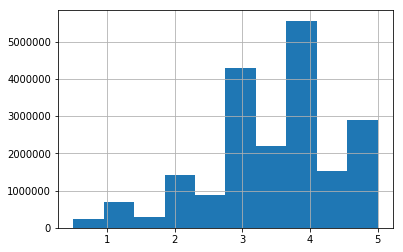

In [9]:
ratings.rating.hist()

In [29]:
#userId's are contiguous
print(len( ratings.userId.unique()) == ratings.userId.max())
#movieId's are not contiguous
print(len( ratings.movieId.unique()) == ratings.movieId.max())

True
False


In [11]:

reviews_per_movie.describe()

count    26744.000000
mean       747.841123
std       3085.818268
min          1.000000
25%          3.000000
50%         18.000000
75%        205.000000
max      67310.000000
Name: movieId, dtype: float64

In [12]:
reviews_per_user = ratings.groupby('userId').userId.apply(lambda x: len(x))
reviews_per_user.describe()

count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: userId, dtype: float64

# TAGS

In [14]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [14]:
tag_counts = tags.groupby('tag').tag.count().sort_values(ascending = False)
tag_counts.head(20)

tag
sci-fi                3384
based on a book       3281
atmospheric           2917
comedy                2779
action                2657
surreal               2427
BD-R                  2334
twist ending          2323
funny                 2072
dystopia              1991
stylized              1941
quirky                1906
dark comedy           1899
classic               1769
psychology            1754
fantasy               1703
time travel           1549
romance               1534
visually appealing    1509
disturbing            1487
Name: tag, dtype: int64